In [1]:
import pandas as pd

In [2]:
field = pd.read_csv("field.csv", sep = ",") #Importing our two data sets and making them a dataframe
lab = pd.read_csv("lab.csv", sep = ",")

In [3]:
total = pd.concat([field, lab], axis=1) #Combing the two dataframes with concat function
#Make sure to set axis = 1 for columns

#Source: https://stackoverflow.com/questions/12850345/how-do-i-combine-two-dataframes

In [4]:
total1 = total[['STATION', 'FLOW', 'MEHGSWFC', 'MEHGSDFC', 'MEHGSGAFC', 'BDPBFS', 'BDPCFS']] #Isolating our desired variables
total1 = total1.rename(columns={'STATION': 'Station', 'FLOW': 'Flow', 'MEHGSWFC': 'MeHgWater', 'MEHGSDFC': 'MeHgSoil', 'MEHGSGAFC': 'MeHgSawG', 'BDPBFS': 'BDB', 'BDPCFS': 'BDE'}) #Renaming variables for clar
total2 = total1.drop(0) #Removing units row
total3 = total2[['Station', 'Flow', 'MeHgWater', 'MeHgSoil', 'MeHgSawG', 'BDB', 'BDE']].astype(float) #Making sure our values are a float
#total3 = total2['Station'].astype(float)
#Source: https://stackoverflow.com/questions/11346283/renaming-column-names-in-pandas

In [5]:
ben = total3.drop(['BDE'], axis = 1) #Creating two dataframes, one for each species: benthic and epiphyte
epi = total3.drop(['BDB'], axis = 1)

In [6]:
ben1 = ben[ben['BDB'].notna()] #Removing stations that do not have any benthic periphyton present
epi1 = epi[epi['BDE'].notna()] #Removing stations that do not have any epiphyte periphyton present

#Using .notna() function
#Source: https://stackoverflow.com/questions/60537198/how-do-i-remove-nan-values-from-dataframe-in-python-dropna-does-not-seem-to-b

In [7]:
ben2 = ben1[['Station', 'Flow', 'MeHgWater', 'MeHgSoil', 'MeHgSawG', 'BDB']].fillna(float(0)) #Replacing NaN values with zero, made sure that the zero is a float 
epi2 = epi1[['Station', 'Flow', 'MeHgWater', 'MeHgSoil', 'MeHgSawG', 'BDE']].fillna(float(0))

#Using .fillna function 
#Source: https://sparkbyexamples.com/pandas/pandas-replace-nan-values-by-zero-in-a-column/#:~:text=The%20primary%20method%20to%20replace,fillna(0)%20.

In [8]:
#Data Descrpition Part a: Mean, Median, and Mode

print("Benthic Periphyton Data Analysis")
print()
print("Mean")
print(ben2.mean())
print()
print("Median")
print(ben2.median())
print()
print("Standard Deviation")
print(ben2.std())
print()
print()
print()
print("Epiphyte Periphyton Data Analysis")
print()
print("Mean")
print(epi2.mean())
print()
print("Median")
print(epi2.median())
print()
print("Standard Deviation")
print(epi2.std())

Benthic Periphyton Data Analysis

Mean
Station      145.451613
Flow           1.451613
MeHgWater      0.124258
MeHgSoil       0.735806
MeHgSawG       0.040645
BDB            0.165806
dtype: float64

Median
Station      202.00
Flow           1.00
MeHgWater      0.10
MeHgSoil       0.46
MeHgSawG       0.00
BDB            0.15
dtype: float64

Standard Deviation
Station      93.610839
Flow          0.809885
MeHgWater     0.088559
MeHgSoil      0.962305
MeHgSawG      0.080579
BDB           0.098549
dtype: float64



Epiphyte Periphyton Data Analysis

Mean
Station      168.042254
Flow           1.507042
MeHgWater      0.149141
MeHgSoil       1.050000
MeHgSawG       0.055634
BDE            0.070000
dtype: float64

Median
Station      203.00
Flow           1.00
MeHgWater      0.10
MeHgSoil       0.55
MeHgSawG       0.00
BDE            0.06
dtype: float64

Standard Deviation
Station      90.413090
Flow          0.825889
MeHgWater     0.121175
MeHgSoil      1.216777
MeHgSawG      0.100722
BDE   

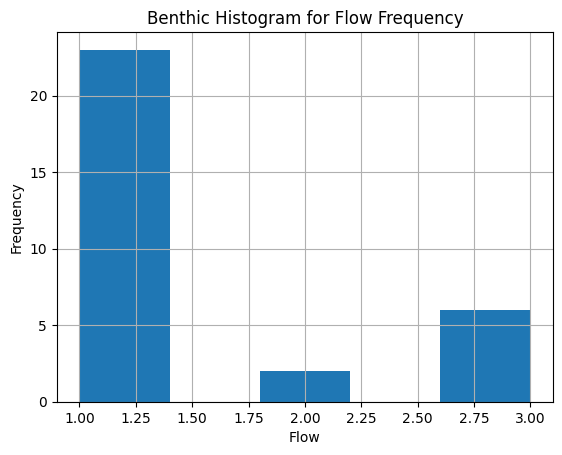

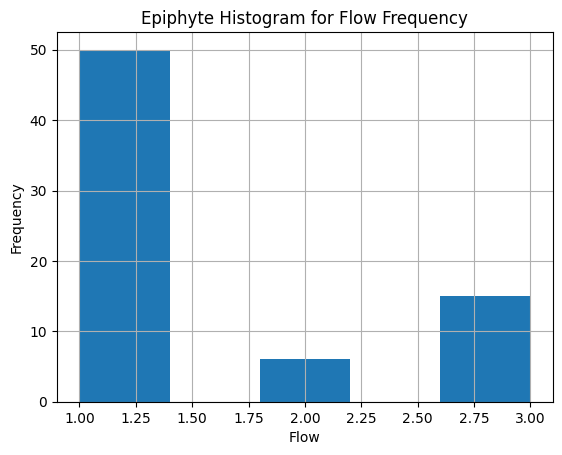

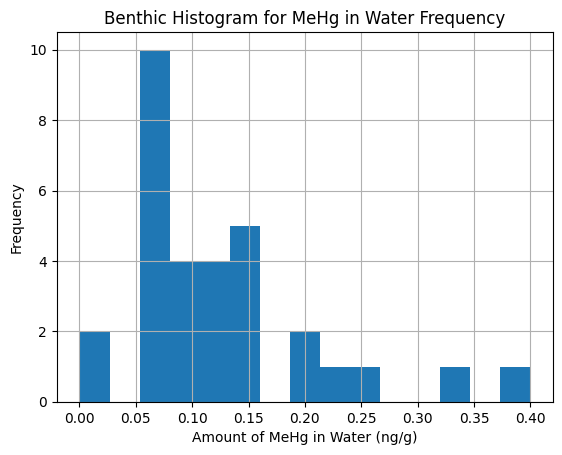

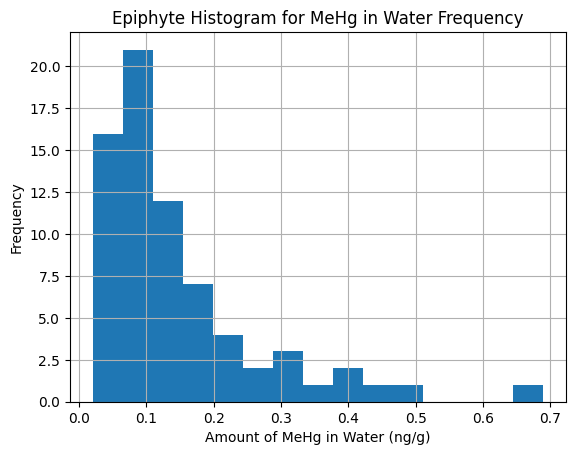

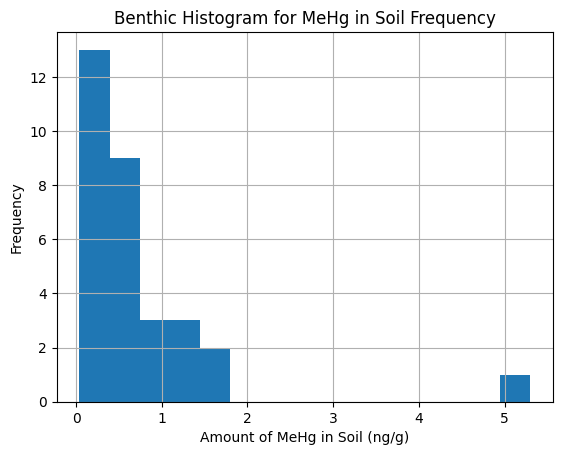

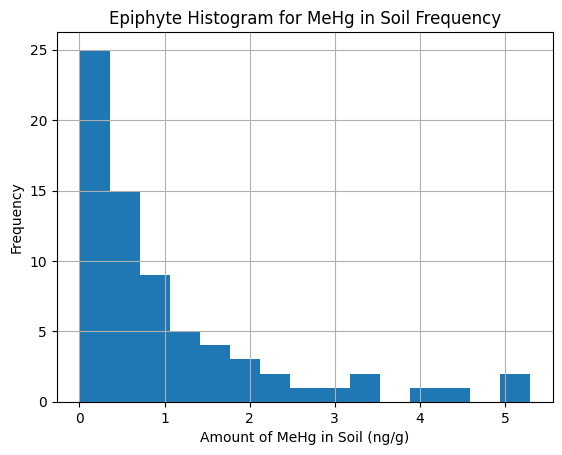

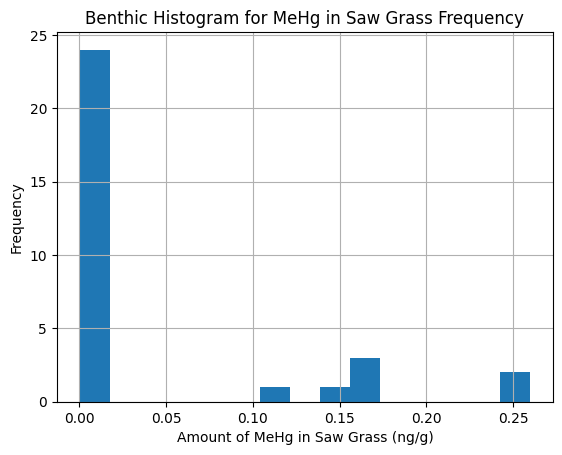

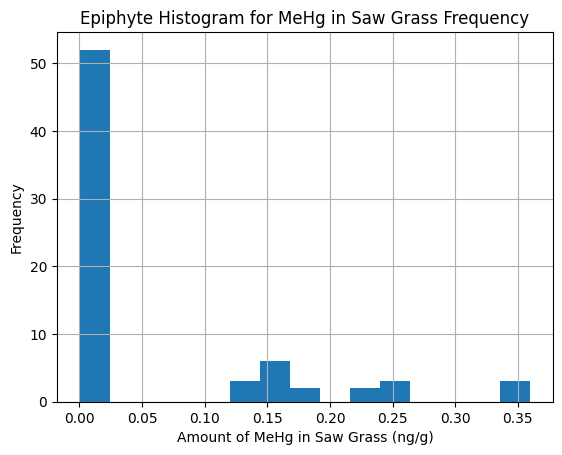

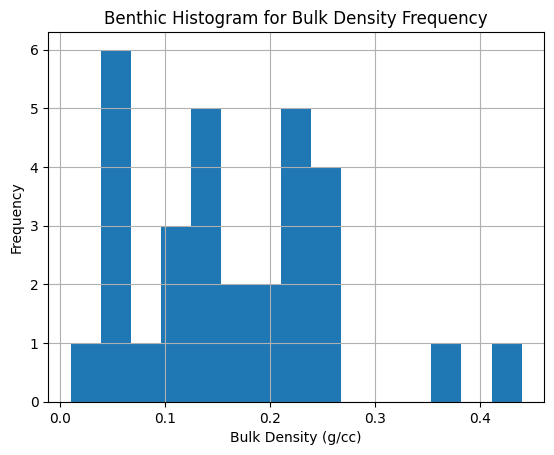

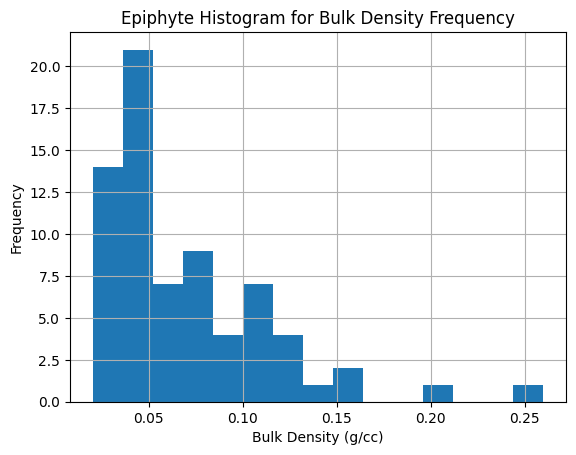

In [9]:
#Data Description Part b Histogram per Variable

import matplotlib.pyplot as plt

#Flow Frequency
histbf = ben2['Flow'].hist(bins=5)
plt.title('Benthic Histogram for Flow Frequency') 
plt.xlabel('Flow') 
plt.ylabel('Frequency') 
plt.show()

histef = epi2['Flow'].hist(bins=5)
plt.title('Epiphyte Histogram for Flow Frequency') 
plt.xlabel('Flow') 
plt.ylabel('Frequency')
plt.show()

#Frequecy of the amount of MeHg in the water
histbw = ben2['MeHgWater'].hist(bins=15)
plt.title('Benthic Histogram for MeHg in Water Frequency') 
plt.xlabel('Amount of MeHg in Water (ng/g)') 
plt.ylabel('Frequency') 
plt.show()

histew = epi2['MeHgWater'].hist(bins=15)
plt.title('Epiphyte Histogram for MeHg in Water Frequency') 
plt.xlabel('Amount of MeHg in Water (ng/g)') 
plt.ylabel('Frequency')
plt.show()

#Frequency of the amount of MeHg in the Soil
histbs = ben2['MeHgSoil'].hist(bins=15)
plt.title('Benthic Histogram for MeHg in Soil Frequency') 
plt.xlabel('Amount of MeHg in Soil (ng/g)') 
plt.ylabel('Frequency') 
plt.show()

histes = epi2['MeHgSoil'].hist(bins=15)
plt.title('Epiphyte Histogram for MeHg in Soil Frequency') 
plt.xlabel('Amount of MeHg in Soil (ng/g)') 
plt.ylabel('Frequency')
plt.show()

#Frequency of the amount of MeHg in Saw Grass
histbsg = ben2['MeHgSawG'].hist(bins=15)
plt.title('Benthic Histogram for MeHg in Saw Grass Frequency') 
plt.xlabel('Amount of MeHg in Saw Grass (ng/g)') 
plt.ylabel('Frequency') 
plt.show()

histesg = epi2['MeHgSawG'].hist(bins=15)
plt.title('Epiphyte Histogram for MeHg in Saw Grass Frequency') 
plt.xlabel('Amount of MeHg in Saw Grass (ng/g)') 
plt.ylabel('Frequency')
plt.show()

#Frequency of the Bulk Density per Species
histbdb = ben2['BDB'].hist(bins=15)
plt.title('Benthic Histogram for Bulk Density Frequency') 
plt.xlabel('Bulk Density (g/cc)') 
plt.ylabel('Frequency') 
plt.show()

histbde = epi2['BDE'].hist(bins=15)
plt.title('Epiphyte Histogram for Bulk Density Frequency') 
plt.xlabel('Bulk Density (g/cc)') 
plt.ylabel('Frequency')
plt.show()


In [10]:
#Correlation Part a Pearson and Spearman Correlation Coefficients

#Will be comparing for Bulk Density

#Pearson Correlation for Benthic and Epiphyte
print(ben2.corr(method='pearson')) #BDB and Flow: .225
print(epi2.corr(method='pearson')) #BDE and MeHgSawG: -.031

#Spearman Correlation for Benthic and Epiphyte
print(ben2.corr(method='spearman')) #BDB and Flow: .232
print(epi2.corr(method='spearman')) #BDE and MeHgWater: .109

#Naturally in Pandas, Pearson is the default correlation but I just wrote it out to make it look a bit better

            Station      Flow  MeHgWater  MeHgSoil  MeHgSawG       BDB
Station    1.000000 -0.150510   0.117970 -0.002950  0.067307 -0.171744
Flow      -0.150510  1.000000  -0.372553 -0.072337 -0.147633  0.224988
MeHgWater  0.117970 -0.372553   1.000000 -0.004156 -0.005069 -0.177207
MeHgSoil  -0.002950 -0.072337  -0.004156  1.000000  0.064604 -0.349750
MeHgSawG   0.067307 -0.147633  -0.005069  0.064604  1.000000  0.059120
BDB       -0.171744  0.224988  -0.177207 -0.349750  0.059120  1.000000
            Station      Flow  MeHgWater  MeHgSoil  MeHgSawG       BDE
Station    1.000000  0.086375  -0.042845 -0.023295  0.163199 -0.214955
Flow       0.086375  1.000000  -0.210847 -0.069799 -0.110393 -0.210319
MeHgWater -0.042845 -0.210847   1.000000  0.226835  0.091992 -0.032997
MeHgSoil  -0.023295 -0.069799   0.226835  1.000000  0.323956 -0.173568
MeHgSawG   0.163199 -0.110393   0.091992  0.323956  1.000000 -0.031563
BDE       -0.214955 -0.210319  -0.032997 -0.173568 -0.031563  1.000000
      

In [11]:
#Correlation Part b Linear Regression

from sklearn.linear_model import LinearRegression

#Linear Regression will be based on the Bulk Density and the variables for each species

#Benthic Linear Regression
a = ben2[['BDB']] #We isolate each variable from their respective dataframe
b = ben2[['Flow']]
c = ben2[['MeHgWater']]
d = ben2[['MeHgSoil']]
e = ben2[['MeHgSawG']]

LRba = LinearRegression()
LRba.fit(b,a) #Fitting the model
R2ba = LRba.score(b, a) #We will use the score() function to find R2, will be compared to Bulk Density

LRca = LinearRegression()
LRca.fit(c,a)
R2ca = LRca.score(c, a)

LRda = LinearRegression()
LRda.fit(d,a)
R2da = LRda.score(d, a)

LRea = LinearRegression()
LRea.fit(e,a)
R2ea = LRea.score(e, a)

print("Benthic Linear Regression")
print("BD and Flow:", " ", R2ba)
print("BD and MeHgWater:", " ", R2ca)
print("BD and MeHgSoil:", " ", R2da)
print("BD and MeHgSawG:", " ", R2ea)
print()
print()

#Epiphyte Linear Regression
f = epi2[['BDE']]
g = epi2[['Flow']]
h = epi2[['MeHgWater']]
i = epi2[['MeHgSoil']]
j = epi2[['MeHgSawG']]

LRgf = LinearRegression()
LRgf.fit(g,f)
R2gf = LRgf.score(g, f)

LRhf = LinearRegression()
LRhf.fit(h,f)
R2hf = LRhf.score(h, f)

LRif = LinearRegression()
LRif.fit(i,f)
R2if = LRif.score(i, f)

LRjf = LinearRegression()
LRjf.fit(j,f)
R2jf = LRjf.score(j, f)

print("Epiphyte Linear Regression")
print("BD and Flow:", " ", R2gf)
print("BD and MeHgWater:", " ", R2hf)
print("BD and MeHgSoil:", " ", R2if)
print("BD and MeHgSawG:", " ", R2jf)

#Source: https://saturncloud.io/blog/linear-regression-with-pandas-dataframe/

Benthic Linear Regression
BD and Flow:   0.050619654706761885
BD and MeHgWater:   0.031402368578268836
BD and MeHgSoil:   0.12232526936254373
BD and MeHgSawG:   0.003495116492123751


Epiphyte Linear Regression
BD and Flow:   0.0442342582119013
BD and MeHgWater:   0.001088787435655325
BD and MeHgSoil:   0.030125867457092892
BD and MeHgSawG:   0.0009961939262798092


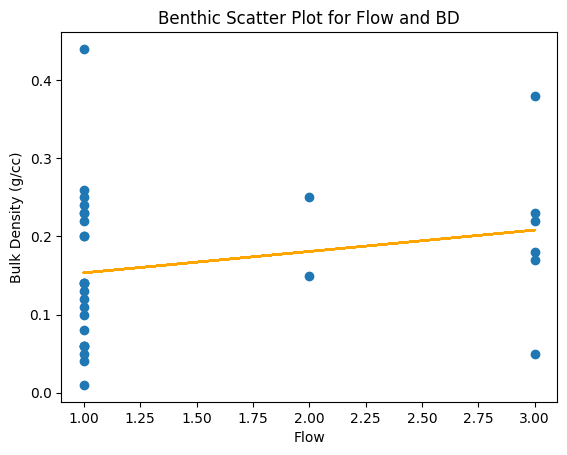

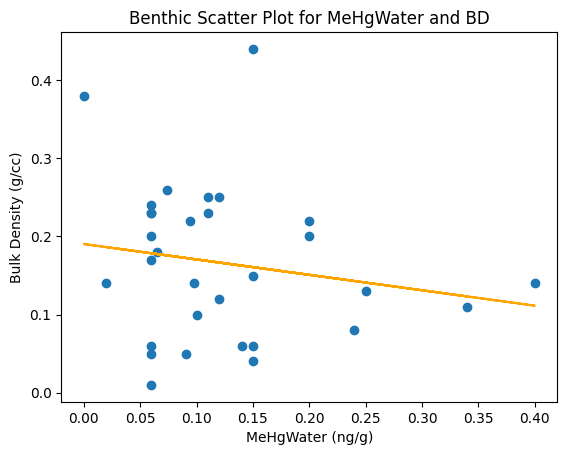

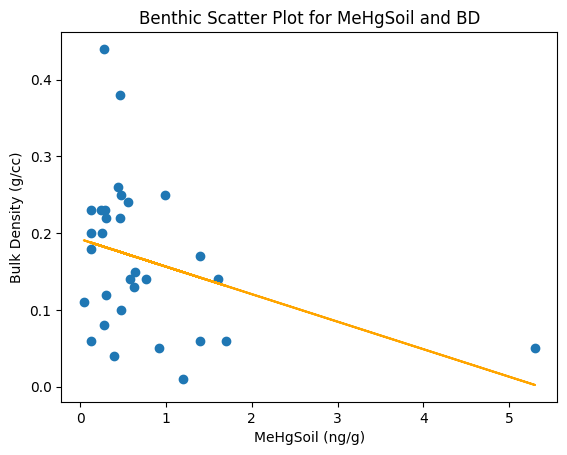

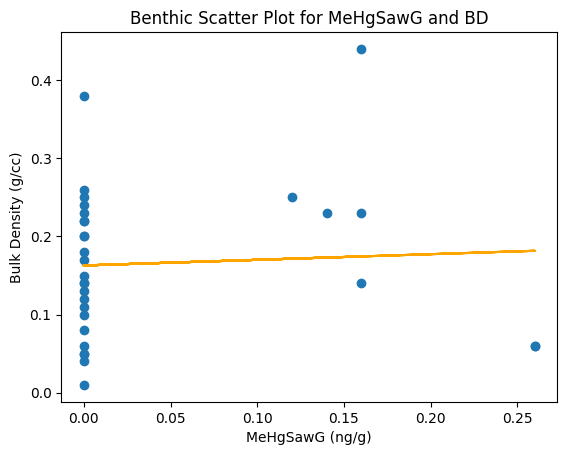

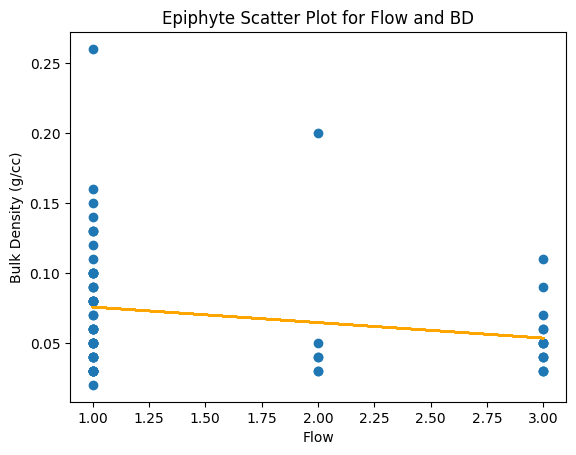

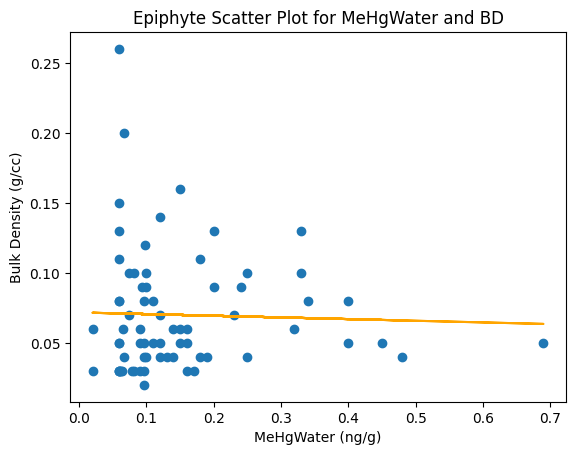

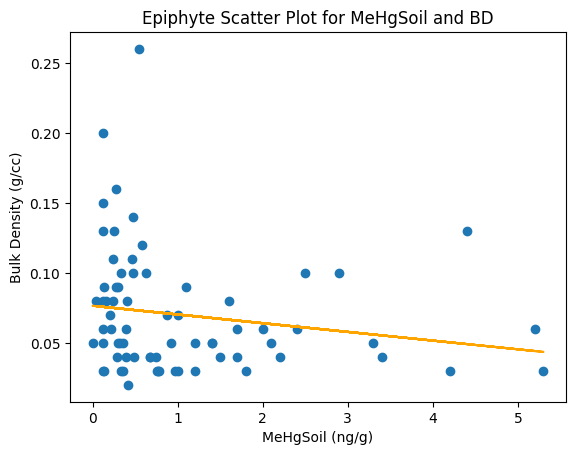

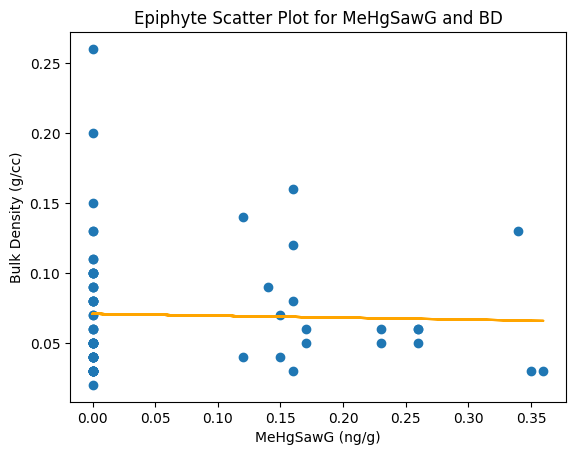

In [12]:
#Correlation Part c Scatter Plots with Linear Regression

#Benthic Scatter Plots with Linear Regression
LRbapred = LRba.predict(b) #Setting our linear regression equation, for Flow and BD
plt.scatter(b, a) #Our scatter plot
plt.plot(b, LRbapred, color='orange') #Plotting our linear regression equation with our scatter plot
plt.title('Benthic Scatter Plot for Flow and BD') 
plt.xlabel('Flow') 
plt.ylabel('Bulk Density (g/cc)')
plt.show()

LRcapred = LRca.predict(c) #For MeHgWater and BD
plt.scatter(c, a) 
plt.plot(c, LRcapred, color='orange') 
plt.title('Benthic Scatter Plot for MeHgWater and BD') 
plt.xlabel('MeHgWater (ng/g)') 
plt.ylabel('Bulk Density (g/cc)')
plt.show()

LRdapred = LRda.predict(d) #For MeHgSoil and BD
plt.scatter(d, a) 
plt.plot(d, LRdapred, color='orange') 
plt.title('Benthic Scatter Plot for MeHgSoil and BD') 
plt.xlabel('MeHgSoil (ng/g)') 
plt.ylabel('Bulk Density (g/cc)')
plt.show()

LReapred = LRea.predict(e) #For MeHgSawG and BD
plt.scatter(e, a) 
plt.plot(e, LReapred, color='orange') 
plt.title('Benthic Scatter Plot for MeHgSawG and BD') 
plt.xlabel('MeHgSawG (ng/g)') 
plt.ylabel('Bulk Density (g/cc)')
plt.show()

#Epiphyte Scatter Plots with Linear Regression
LRgfpred = LRgf.predict(g) #For Flow and BD
plt.scatter(g, f) 
plt.plot(g, LRgfpred, color='orange') 
plt.title('Epiphyte Scatter Plot for Flow and BD') 
plt.xlabel('Flow') 
plt.ylabel('Bulk Density (g/cc)')
plt.show()

LRhfpred = LRhf.predict(h) #For MeHgWater and BD
plt.scatter(h, f) 
plt.plot(h, LRhfpred, color='orange') 
plt.title('Epiphyte Scatter Plot for MeHgWater and BD') 
plt.xlabel('MeHgWater (ng/g)') 
plt.ylabel('Bulk Density (g/cc)')
plt.show()

LRifpred = LRif.predict(i) #For MeHgSoil and BD
plt.scatter(i, f) 
plt.plot(i, LRifpred, color='orange') 
plt.title('Epiphyte Scatter Plot for MeHgSoil and BD') 
plt.xlabel('MeHgSoil (ng/g)') 
plt.ylabel('Bulk Density (g/cc)')
plt.show()

LRjfpred = LRjf.predict(j) #For MeHgSawG and BD
plt.scatter(j, f) 
plt.plot(j, LRjfpred, color='orange') 
plt.title('Epiphyte Scatter Plot for MeHgSawG and BD') 
plt.xlabel('MeHgSawG (ng/g)') 
plt.ylabel('Bulk Density (g/cc)')
plt.show()

#Source: https://stackoverflow.com/questions/36420908/can-i-draw-a-regression-line-and-show-parameters-using-scatterplot-with-a-pandas

In [64]:
#Dimensionality Reduction Part a PCA for All Variables

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

#Benthic 
a1 = pd.cut(a['BDB'], bins=3, labels=['Low', 'Medium', 'High'])#Separating our BD by three different classes
a2 = pd.DataFrame({'BDB Class': a1}) #Adding a header
a2.reset_index(inplace=True) #Had to reset the index since it was still based off of original dataframe
ben3 = ben2.drop(['BDB', 'Station'], axis = 1) #Removing our target variable, Bulk Density, from dataframe

ben3 = StandardScaler().fit_transform(ben3) #Standardizing our values

pcab = PCA(n_components=2) #Creating our PCA
componentsb = pcab.fit_transform(ben3) 
bdf = pd.DataFrame(data = componentsb
             , columns = ['PC1', 'PC2']) #Headers for components
bdf2 = pd.concat([bdf, a2[['BDB Class']]], axis = 1) #Combining our two dataframes

#Epiphyte
f1 = pd.cut(f['BDE'], bins=3, labels=['Low', 'Medium', 'High'])
f2 = pd.DataFrame({'BDE Class': f1}) 
f2.reset_index(inplace=True) 
epi3 = epi2.drop(['BDE', 'Station'], axis = 1) 

epi3 = StandardScaler().fit_transform(epi3) 

pcae = PCA(n_components=2)
componentse = pcae.fit_transform(epi3)
edf = pd.DataFrame(data = componentse
             , columns = ['PC1', 'PC2'])
edf2 = pd.concat([edf, f2[['BDE Class']]], axis = 1)

#Source: https://builtin.com/machine-learning/pca-in-python

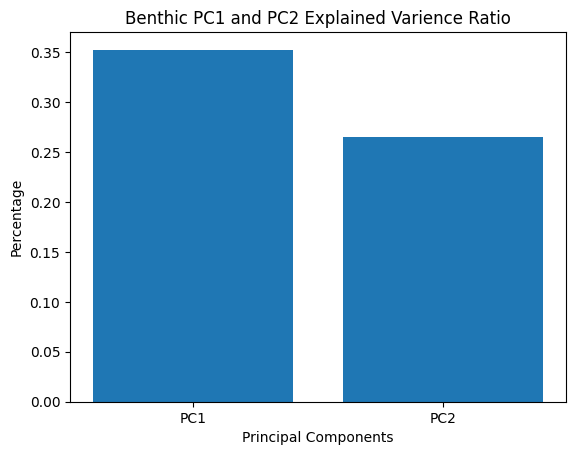

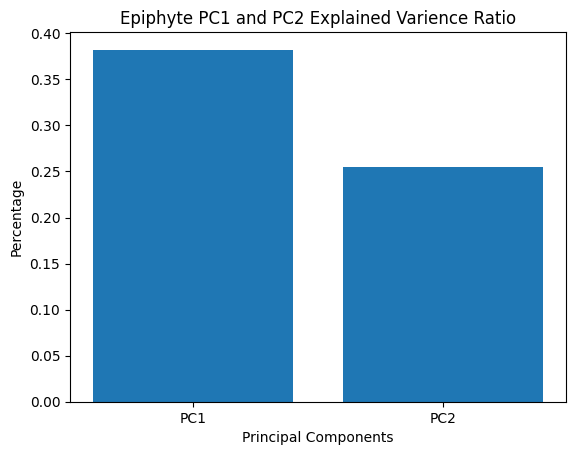

In [89]:
#Dimensionality Reduction Part b Explained Varience Ratio Bar Chart

#Benthic PC1 and PC2 Explained Varience Ratio Bar Chart
bx = ['PC1', 'PC2']
by = pcab.explained_variance_ratio_
plt.bar(bx, by)
plt.title('Benthic PC1 and PC2 Explained Varience Ratio') 
plt.xlabel('Principal Components') 
plt.ylabel('Percentage')
plt.show()

#Epiphyte PC1 and PC2 Explained Varience Ratio Bar Chart
ex = ['PC1', 'PC2']
ey = pcae.explained_variance_ratio_
plt.bar(ex, ey)
plt.title('Epiphyte PC1 and PC2 Explained Varience Ratio') 
plt.xlabel('Principal Components') 
plt.ylabel('Percentage')
plt.show()

#Source: https://builtin.com/machine-learning/pca-in-python

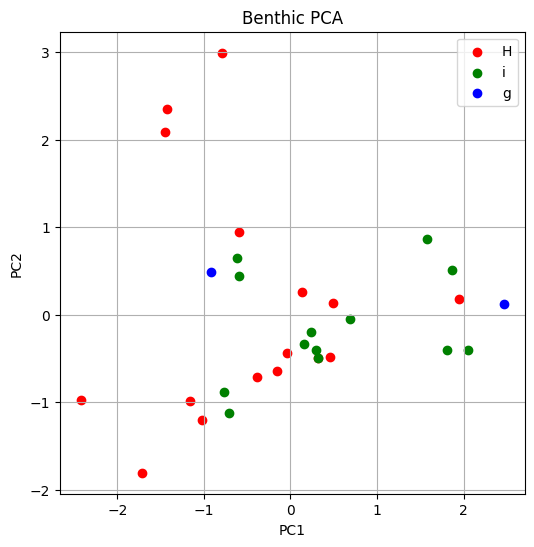

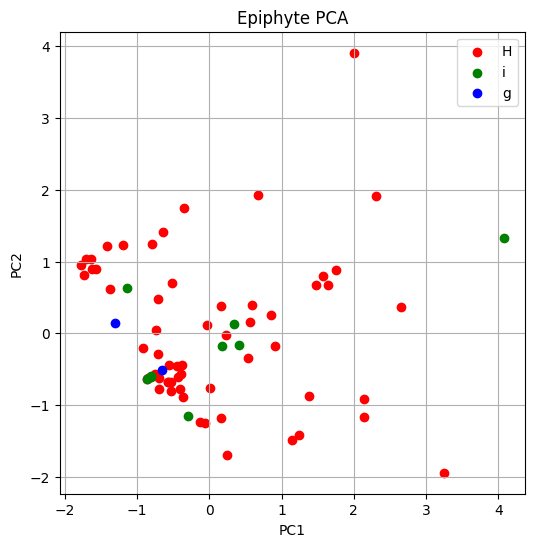

In [87]:
#Dimensionality Reduction Part c Visualizing PC1 and PC2

#Benthic
scatterb = plt.figure(figsize = (6,6))
ax = scatterb.add_subplot(1,1,1) 
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_title('Benthic PCA')

BDBClass = ['Low', 'Medium', 'High'] #Based off of the 'target,' which is the amount of bulk density
colors = ['r', 'g', 'b'] #Colors for the three types of bulk densties
for BDBClass, color in zip(BDBClass,colors):
    indicesb = bdf2['BDB Class'] == BDBClass
    ax.scatter(bdf2.loc[indicesb, 'PC1'], bdf2.loc[indicesb, 'PC2'], c = color)
ax.legend(BDBClass)
ax.grid()

#Epiphyte
scattere = plt.figure(figsize = (6,6))
ax = scattere.add_subplot(1,1,1) 
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_title('Epiphyte PCA')

BDEClass = ['Low', 'Medium', 'High']
colors = ['r', 'g', 'b']
for BDEClass, color in zip(BDEClass,colors):
    indicese = edf2['BDE Class'] == BDEClass
    ax.scatter(edf2.loc[indicese, 'PC1'], edf2.loc[indicese, 'PC2'], c = color)
ax.legend(BDEClass)
ax.grid()

#Source: https://medium.com/@denizgunay/principal-component-analysis-pca-d8edf2bb6620